# Weighted ECM clustering
## Toys dataset - 2 clusters, 6 dimensions


In [4]:
## Importing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential, ev_plot_2D
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014


          0         1         2         3         4         5
0  0.223248  2.606554 -0.669845 -3.047209  4.858650  0.967867
1  0.570278 -0.831117 -1.704321  0.561818  0.178342  0.884180
2  1.393925  0.676908  1.102410 -2.709991 -0.611678  1.199641
3  2.329831 -3.047742 -1.956628  6.087984 -2.378940  1.282781
4  3.288549  0.391498 -0.672776 -1.564350  1.259775  0.482085


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


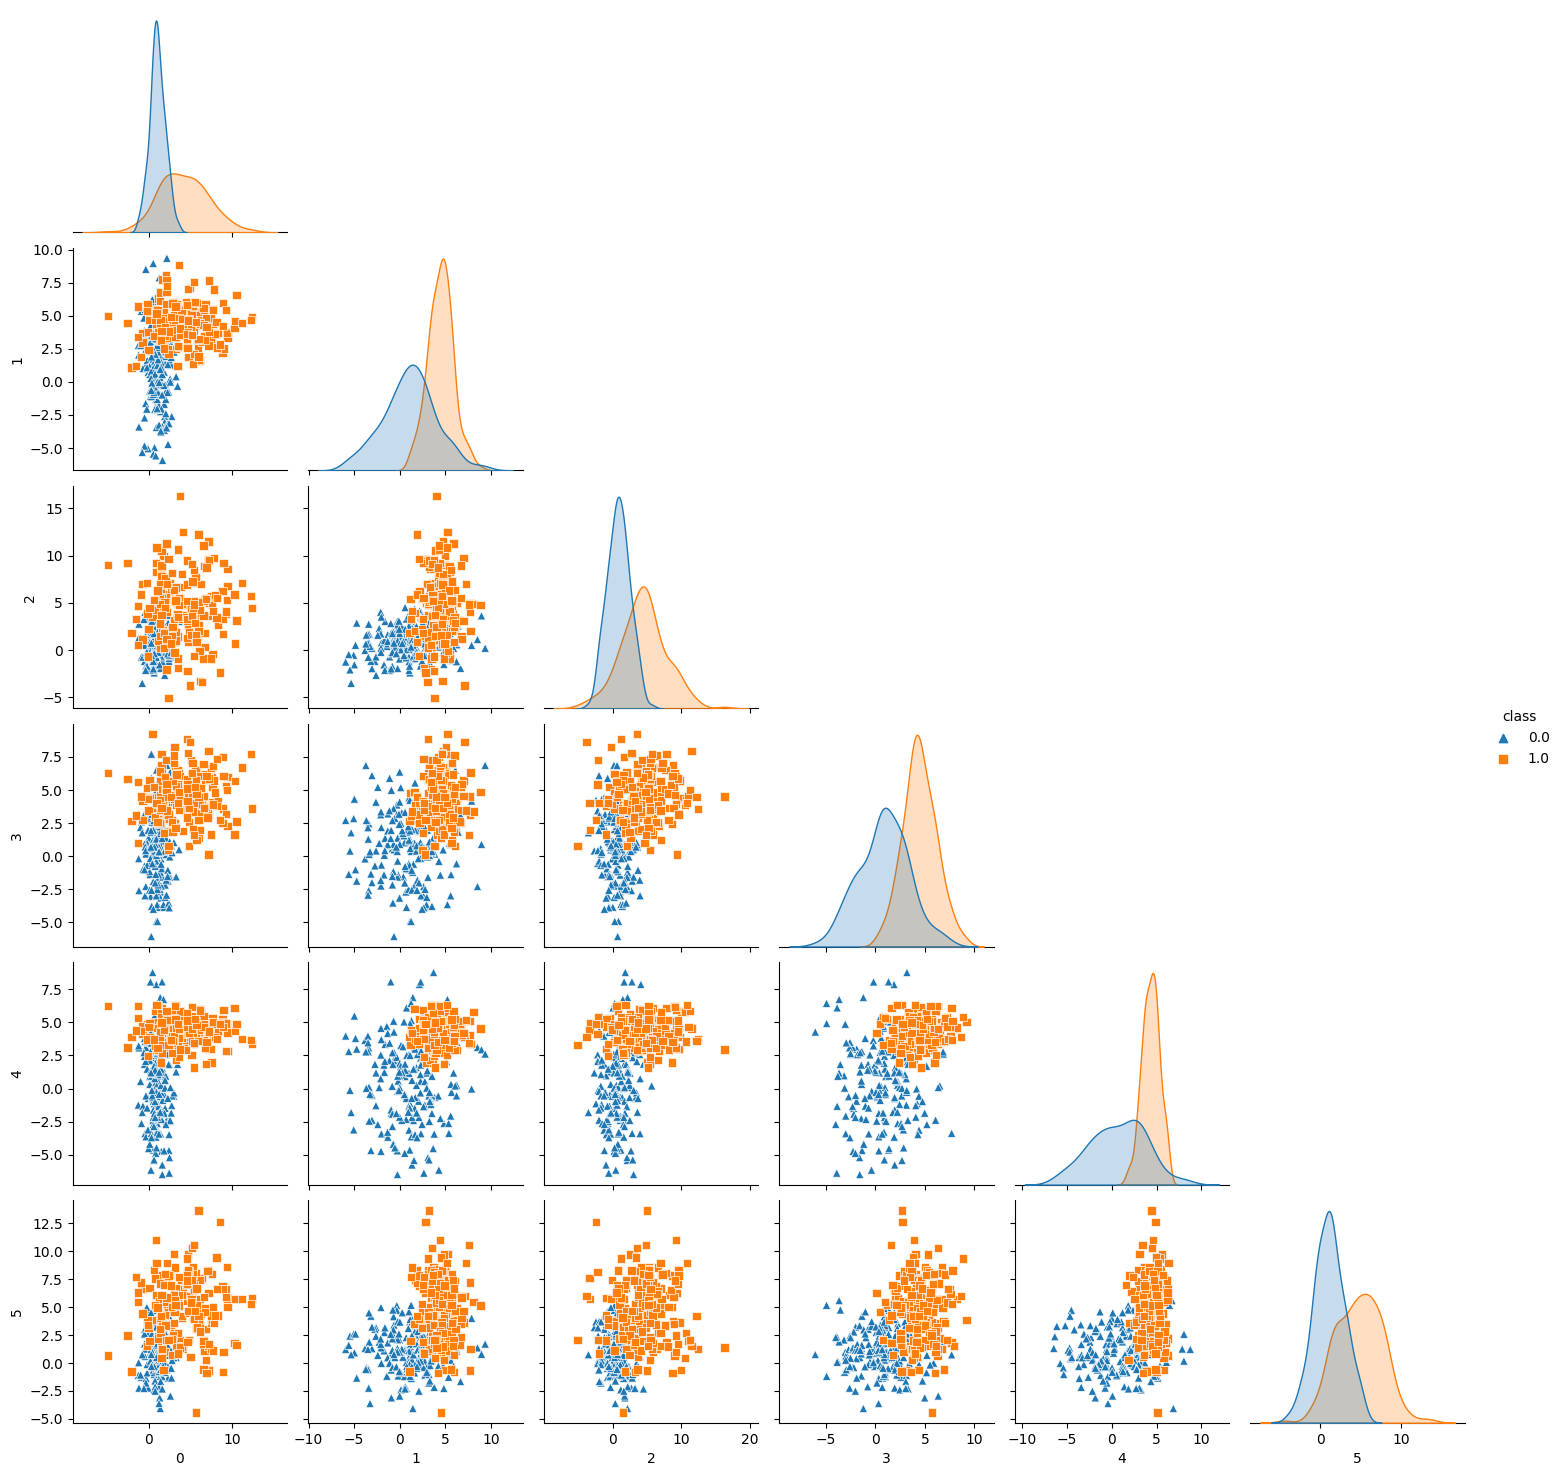

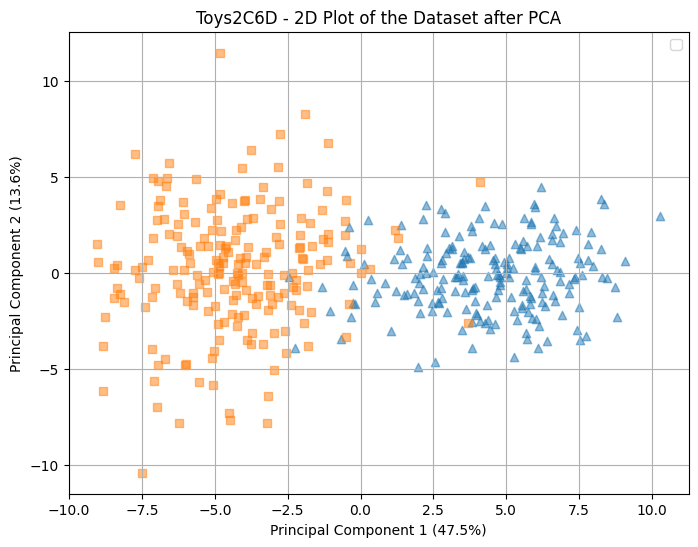

In [5]:
## Generating data set
df_wt_label = pd.read_csv('../../src/evclust/datasets/2c6dDataset.csv')
dataset = df_wt_label.values
X = pd.DataFrame(dataset[:, :-1])
y = pd.DataFrame(dataset[:, -1]) 

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's']
plotting(X, y, "Toys2C6D", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))
c = 2

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [3]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, ntrials=1)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x : x['crit'])

J values: [25.64677197145275, 25.64677197145275, 25.64677197145275, 25.64677197145275, 25.64677197145275, 25.64678996319235, 25.64678996319235, 25.64678996319235, 25.64678996319235, 25.64678996319235]
ARI values: [0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241, 0.8364260858597241]
NS values: [0.9602956031114156, 0.9602956031114156, 1.0026410509383759, 1.0026410509383759, 1.0026410509383759, 1.002708017240053, 0.9602500811974478, 0.9602500811974478, 0.9602500811974478, 1.002708017240053]
NMI values: [0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102, 0.7651081159700102]


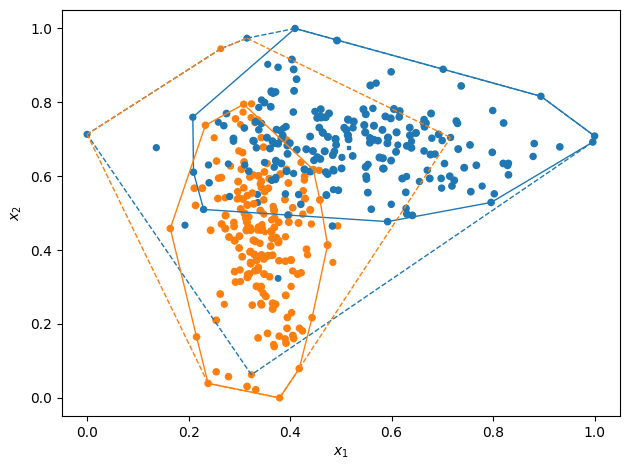

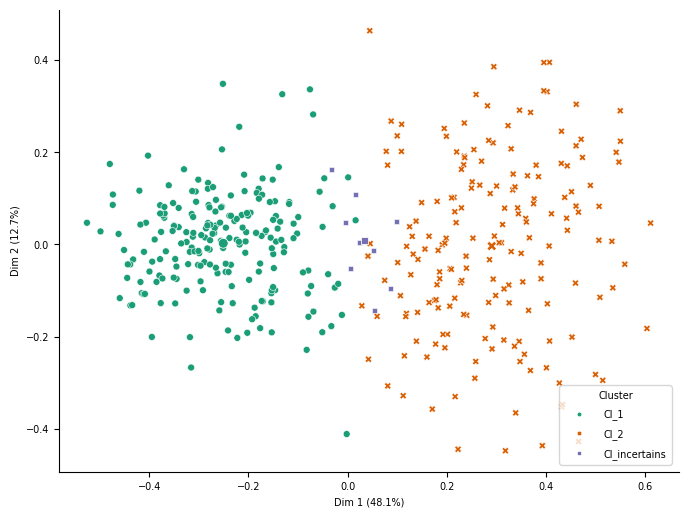

In [4]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM)

In [9]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, epsilon=1e-6)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.4073912256962894, 0.4073912256962894, 0.4073912256962894, 0.4073912256962894, 0.4073912256962894, 0.4073912256962894, 0.40739125570470935, 0.40739125570470935, 0.4073912557047097, 0.4073912557047097]
ARI values: [0.7557214618801944, 0.7557214618801944, 0.7557214618801944, 0.7557214618801944, 0.7557214618801944, 0.7557214618801944, 0.7557214618801944, 0.7557214618801944, 0.7557214618801944, 0.7557214618801944]
NS values: [0.9947811440543056, 0.9963446855284738, 0.9947811440543056, 0.9947811440543056, 0.9947811440543056, 0.9947811440543056, 0.9947812631739562, 0.9947812631739562, 0.9963447427873449, 0.9963447427873449]
NMI values: [0.6617739276911396, 0.6617739276911396, 0.6617739276911396, 0.6617739276911396, 0.6617739276911396, 0.6617739276911396, 0.6617739276911396, 0.6617739276911396, 0.6617739276911396, 0.6617739276911396]


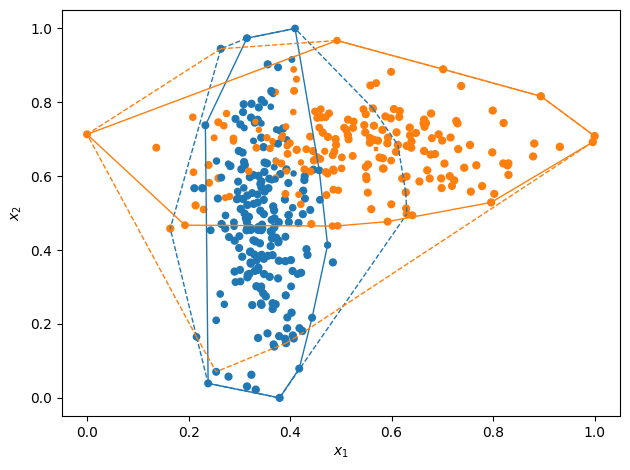

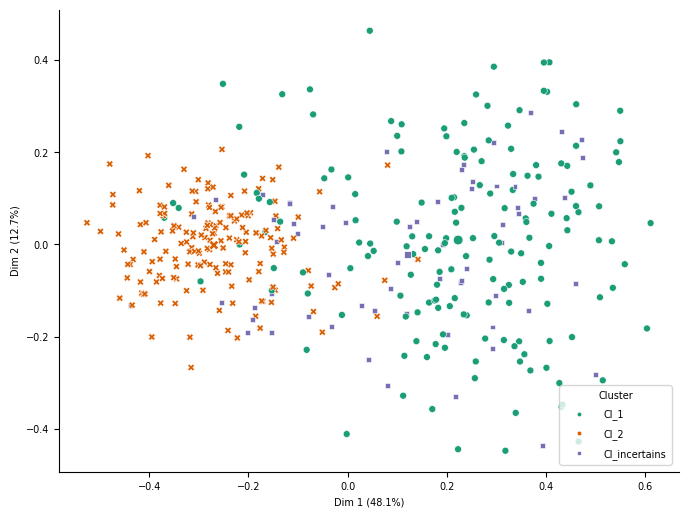

In [10]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [3]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, epsilon=1e-6, verbose=True)
    keller_models = np.append(keller_models, model)

J values: [0.524510384999282, 0.524510600934859, 0.5245104073492023, 0.5245106108380554, 0.5245104056992592, 0.5245104308603247, 0.52451043217306, 0.5245105238653944, 0.5245103817249963, 0.5245105126658516]
ARI values: [0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234]
NMI values: [0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617]


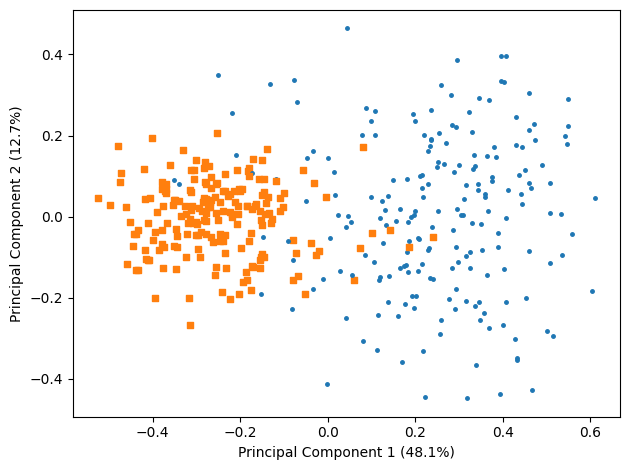

In [12]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [8]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=1.85, verbose=True)
    wang_models = np.append(wang_models, model)

J values: [0.9004657052916074, 0.900466762055802]
ARI values: [0.8272577886836429, 0.8272577886836429]
NMI values: [0.7558400018300403, 0.7558400018300403]


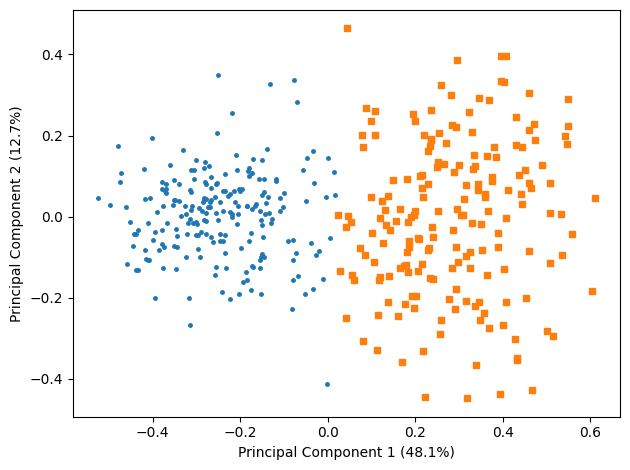

In [9]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [17]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True)
    scad1_models = np.append(scad1_models, model)

J values: [15.172183785627222, 15.172182398392152, 15.172183785627222, 15.172182398392152, 15.172182398392152, 15.172183785627222, 15.172183785627222, 15.172183785627222, 15.172183785627222, 15.172183785627222]
ARI values: [0.8736032599061542, 0.8736032599061542, 0.8736032599061542, 0.8736032599061542, 0.8736032599061542, 0.8736032599061542, 0.8736032599061542, 0.8736032599061542, 0.8736032599061542, 0.8736032599061542]
NMI values: [0.7996972341727523, 0.7996972341727525, 0.7996972341727523, 0.7996972341727525, 0.7996972341727525, 0.7996972341727525, 0.7996972341727523, 0.7996972341727523, 0.7996972341727523, 0.7996972341727523]


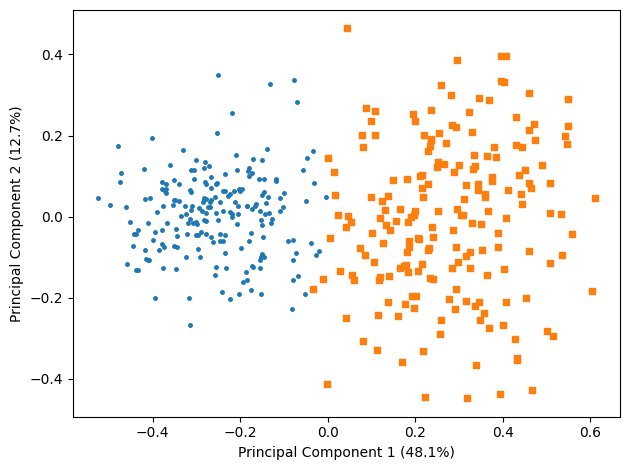

In [18]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [19]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True)
    scad2_models = np.append(scad2_models, model)

J values: [0.5661989540397541, 0.5661989540397541, 0.5661989540397541, 0.5661989540397541, 0.566200640613016, 0.5661989540397541, 0.566200640613016, 0.566200640613016, 0.5661989540397541, 0.566200640613016]
ARI values: [0.9406050214545943, 0.9406050214545943, 0.9406050214545943, 0.9406050214545943, 0.9406050214545943, 0.9406050214545943, 0.9406050214545943, 0.9406050214545943, 0.9406050214545943, 0.9406050214545943]
NMI values: [0.9022615568829881, 0.9022615568829881, 0.9022615568829881, 0.902261556882988, 0.9022615568829881, 0.902261556882988, 0.902261556882988, 0.9022615568829881, 0.902261556882988, 0.9022615568829881]


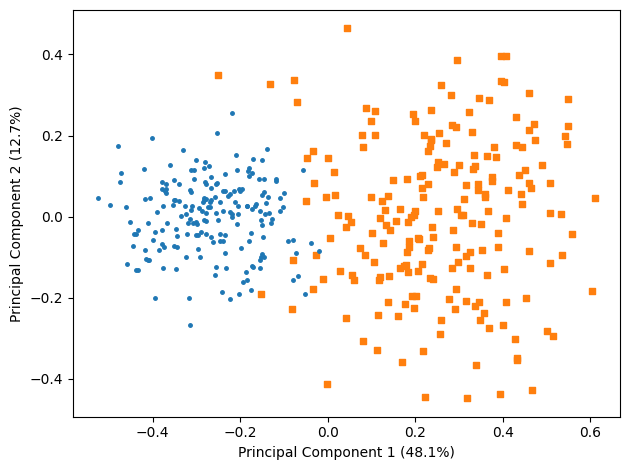

In [20]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [21]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True)
    ifwfcm_models = np.append(ifwfcm_models, model)

J values: [0.8669257813652258, 0.8669282734484933, 0.8669257813652258, 0.8669257813652258, 0.8669282734484933, 0.8669257813652258, 0.8669282734484933, 0.8669282734484933, 0.8669282734484933, 0.8669257813652258]
ARI values: [0.8364242064594328, 0.8272554985985202, 0.8364242064594328, 0.8364242064594328, 0.8272554985985202, 0.8364242064594328, 0.8272554985985202, 0.8272554985985202, 0.8272554985985202, 0.8364242064594328]
NMI values: [0.7459828086322305, 0.7347371046473505, 0.7459828086322305, 0.7459828086322305, 0.7347371046473505, 0.7459828086322305, 0.7347371046473505, 0.7347371046473505, 0.7347371046473505, 0.7459828086322305]


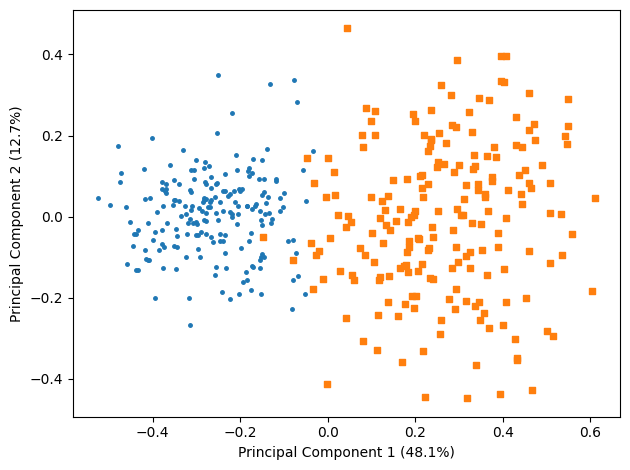

In [22]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [23]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)

J values: [21.915377234796043, 21.915377234796043, 21.915377234796043, 21.91537724428465, 21.91537724428465, 21.915377234796043, 21.915377244284635, 21.91537724428465, 21.915377234796043, 21.915377244284635]
ARI values: [0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234, 0.8456434087699234]
NMI values: [0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617, 0.7589774601369617]


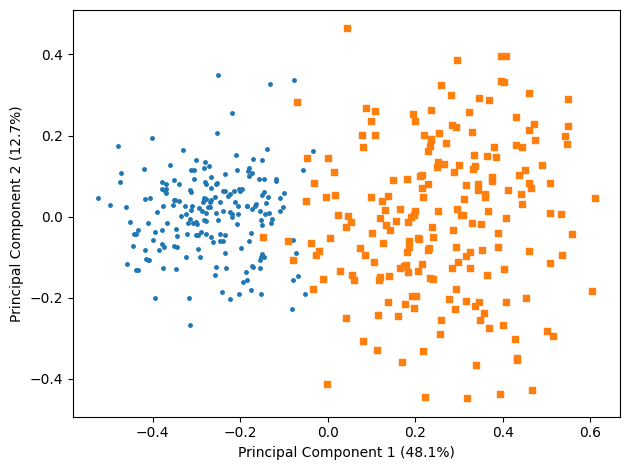

In [24]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)